# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [24]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


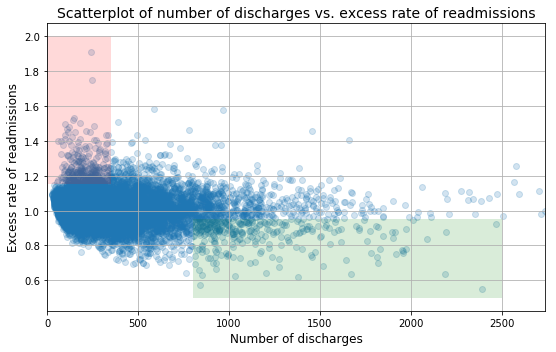

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [32]:
clean_hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,0.0,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,0.0,07/01/2010,06/30/2013


In [7]:
len(clean_hospital_read_df)

11578

In [29]:
hosp = clean_hospital_read_df
hosp["Number of Readmissions"].fillna(0,inplace=True)

In [34]:
hosp.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,0.0,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,0.0,07/01/2010,06/30/2013


In [37]:
hos = hosp[hosp["Excess Readmission Ratio"].notnull()]
hos.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013


In [39]:
print(len(hosp))
print(len(hos))

11578
11497


We do not consider hospitals with 0 readmissions/discharges since that causes NaN readmit ratios.

# A. Do you agree with the above analysis and recommendations? Why or why not?

The above analysis appears to draw quick conclusions with no support. The plot does not really show much; there may be a slight downward correlation but it is not obvious enough to be considered "significant." The recommendations seem unreasonable for an unfounded conclusion, especially considering the fact that there are many more smaller hospitals than big ones.

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

## 1. Setup an appropriate hypothesis test.



Let R be the mean readmission rate. R<sub>S</sub> be rate for small hospitals, R<sub>B</sub> for big hospitals

**H0**: R<sub>S</sub> = R<sub>B</sub>  
**HA**: R<sub>S</sub> ≠ R<sub>B</sub> 

## 2. Compute and report the observed significance value (or p-value).

The original analysis deemed hospitals with < 300 capacity small. It also perused statistics for < 100 discharges and > 1000 discharges; that cutoff will be used here as well to denote small/large hospitals.

In [77]:
small = hos[hos["Number of Discharges"] < 100]
large = hos[hos["Number of Discharges"] > 1000]

In [80]:
print(len(small),len(large))

1188 463


In [82]:
sm = small["Excess Readmission Ratio"].mean()
lm = large["Excess Readmission Ratio"].mean()
sn = len(small)
ln = len(large)

In [96]:
import scipy.stats as st
st.ttest_ind(small["Excess Readmission Ratio"],large["Excess Readmission Ratio"])

Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)

## 3. Report statistical significance for α = .01.

The p-value obtained is essentially 0, meaning the difference is significant for this model.

## 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance shows that there is a difference. However, what attributes that classify hospitals as small or large is seemingly arbitrary in this case. Practically, the difference could be due to other factors: for example, smaller hospitals may not be as good as large hospitals, so merely consolidating hospitals into a few large ones would not be the correct way to improve conditions.

A linear regression can be performed on the data to determine whether there is a true correlation:

In [69]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = hos['Number of Discharges'].reset_index(drop = True)
Y = hos['Excess Readmission Ratio'].reset_index(drop = True)
X = X.values.reshape(len(X),1)
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
lr.score(X,Y)

0.0094863594001317608

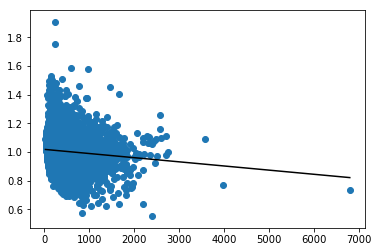

In [97]:
plt.scatter(X,Y)
plt.plot(X,lr.predict(X),color="black")

The R<sup>2</sup> score is very poor, so the supposed "significant" negative correlation conclusion remains suspect.

## 5. Look at the scatterplot above.
### What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

The scatterplot allows easy visualization of the relationship between Number of Discharges and Excess Readmission Ratio. However, there are a lot of data points, and many of them overlap, so the relationship may not be entirely clear. The graph looks cluttered.

We can use violin plots and groups of hospitals by Number of Discharges to get a cleaner plot.

In [143]:
hdf = pd.concat([hos["Excess Readmission Ratio"],hos["Number of Discharges"]],axis=1,keys=['Excess Readmission Ratio','ND'])
hdf.head(2)

,Excess Readmission Ratio,ND
1832,1.0914,25
1699,1.0961,27


In [145]:
group = []
for index, row in hdf.iterrows():
    if row.ND < 250:
        group.append("Less than 250")
    elif row.ND < 500:
        group.append("250-499")
    elif row.ND < 750:
        group.append("500-749")
    elif row.ND < 1000:
        group.append("750-999")
    else:
        group.append("1000 or more")

In [146]:
hdf['Number of Discharges'] = group
hdf.head()

,Excess Readmission Ratio,ND,Number of Discharges
1832,1.0914,25,Less than 250
1699,1.0961,27,Less than 250
1774,1.0934,28,Less than 250
1853,1.0908,29,Less than 250
1290,1.1123,30,Less than 250


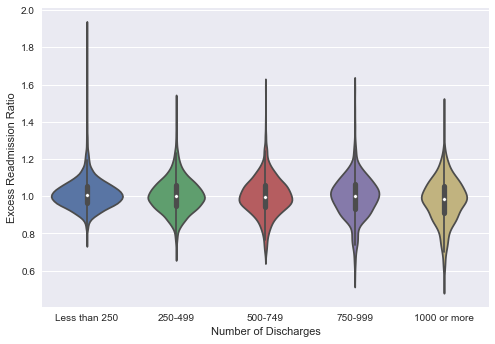

In [147]:
import seaborn as sns
sns.violinplot(x="Number of Discharges",y="Excess Readmission Ratio",data=hdf)

As shown in the violin plot, regardless of the amount of discharges most hospitals had about the same Excess Readmission Ratio, with each group being relatively normally distributed around 1. There appear to be some outliers though, especially in the small number of discharge group.